In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pulse_method.toolbox_pulse import *

In [2]:
operator=thermograms()

In [36]:
path_40="/Users/jaworskj/Desktop/Pulse_data_sample/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 20/param_fbh_gaussian_size15mm_depth40pct_thickness4mm/param_fbh_gaussian_size15mm_depth40pct_thickness4mm.npz"
path_60="/Users/jaworskj/Desktop/Pulse_data_sample/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 20/param_fbh_gaussian_size15mm_depth60pct_thickness4mm/param_fbh_gaussian_size15mm_depth60pct_thickness4mm.npz"
path_30="/Users/jaworskj/Desktop/Pulse_data_sample/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 22/param_fbh_gaussian_size15mm_depth30pct_thickness4mm/param_fbh_gaussian_size15mm_depth30pct_thickness4mm.npz"
data_40=np.load(path_40,allow_pickle=True)
data_60=np.load(path_60,allow_pickle=True)
data_30=np.load(path_30,allow_pickle=True)

In [5]:
data_40.keys()

KeysView(NpzFile '/Users/jaworskj/Desktop/Pulse_data_sample/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 20/param_fbh_gaussian_size15mm_depth40pct_thickness4mm/param_fbh_gaussian_size15mm_depth40pct_thickness4mm.npz' with keys: data, meta, mask)

In [6]:
data_40['meta']

array([['time', '19/07/2025 01:11:26'],
       ['lamp_power', '200'],
       ['lamp_power_units', 'W'],
       ['T1', '4'],
       ['T1_units', 'frames'],
       ['T2', '30'],
       ['T2_units', 'frames'],
       ['T3', '210'],
       ['T3_units', 'frames'],
       ['fps', '30.0'],
       ['fps_units', 'frames/s'],
       ['height', '512'],
       ['height_units', 'pixels'],
       ['width', '512'],
       ['width_units', 'pixels'],
       ['sequence_length', '244'],
       ['sequence_length_units', 'frames'],
       ['working_distance', '200.0'],
       ['working_distance_units', 'mm'],
       ['thickness', '0.004'],
       ['thickness_units', 'm'],
       ['size_X', '0.1'],
       ['size_X_units', 'm'],
       ['size_Y', '0.1'],
       ['size_Y_units', 'm'],
       ['thermal_conductivity', '2.0'],
       ['thermal_conductivity_units', 'W/(m·K)'],
       ['density', '1600.0'],
       ['density_units', 'kg/m^3'],
       ['specific_heat', '700.0'],
       ['specific_heat_units', 'J/(kg

In [7]:
data_40['data'].shape

(244, 512, 512)

In [8]:
data_60['data'].shape

(124, 512, 512)

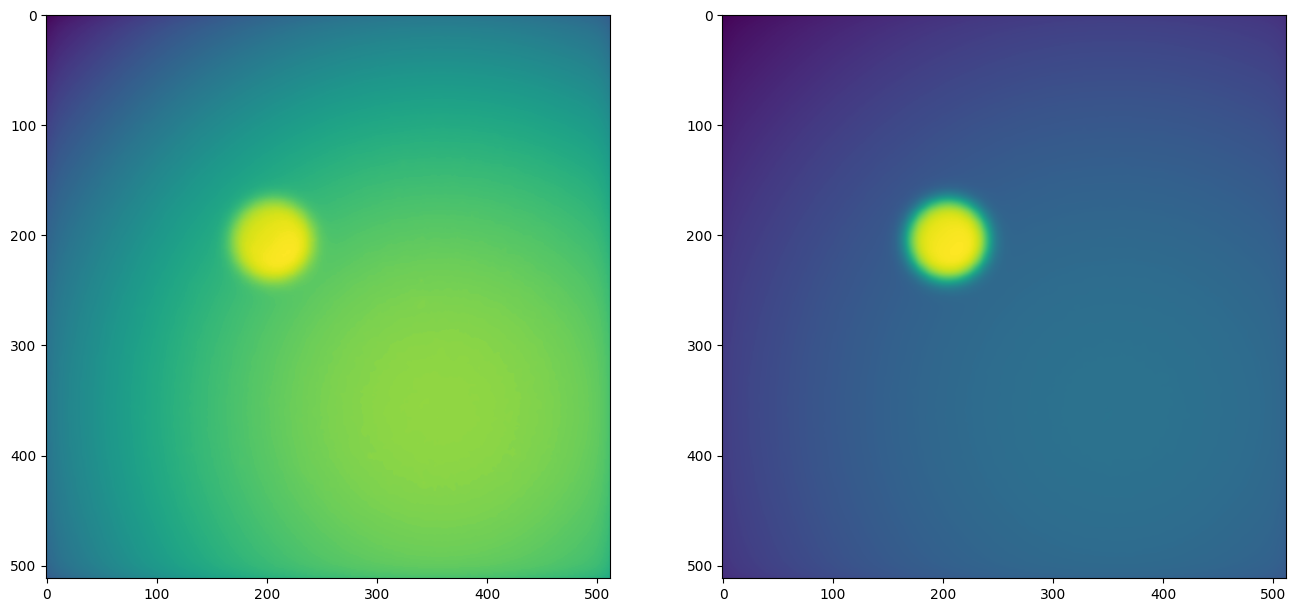

In [9]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.imshow(data_40['data'][50,:,:])
plt.subplot(1,2,2)
plt.imshow(data_60['data'][50,:,:])

Text(0, 0.5, 'Thermal value')

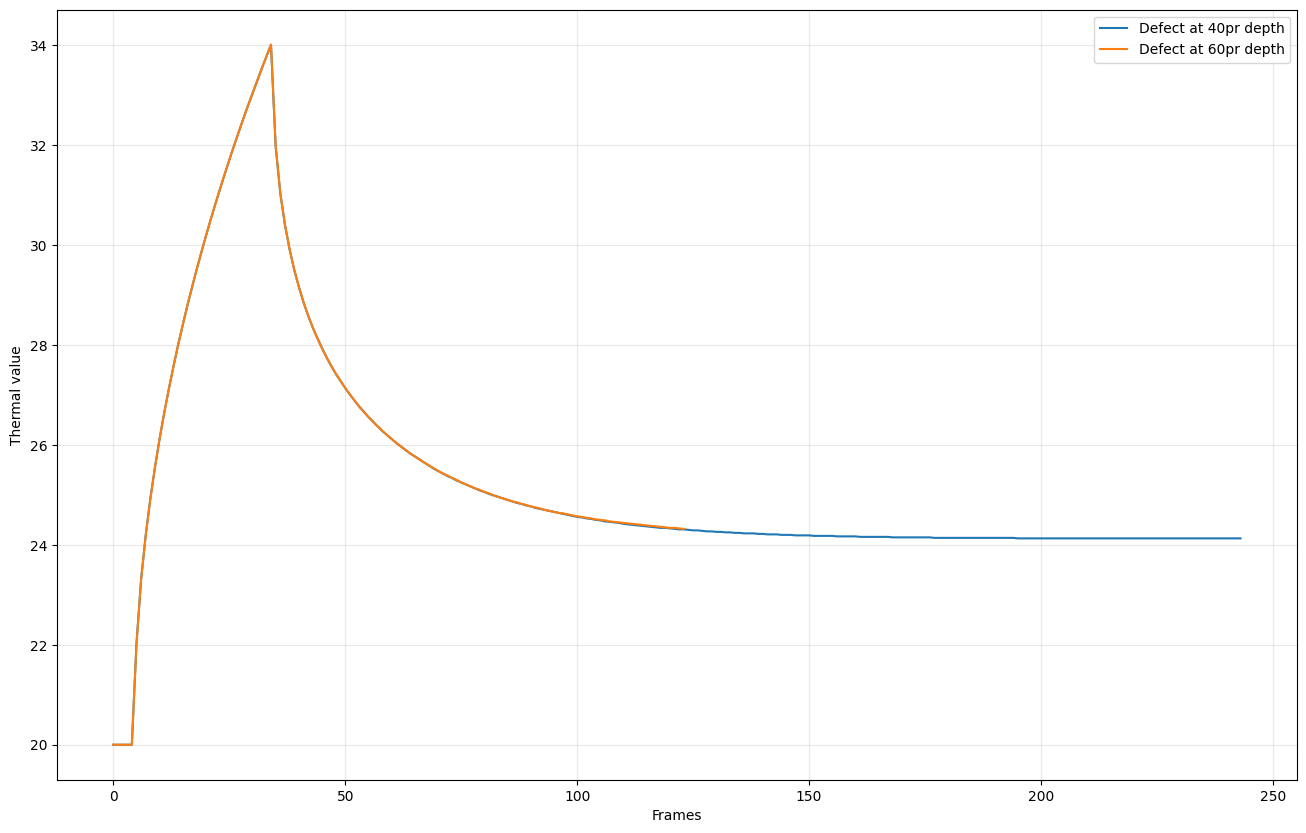

In [11]:
plt.figure(figsize=(16,10))
plt.plot(data_40['data'][:,256,256],label='Defect at 40pr depth')
plt.plot(data_60['data'][:,256,256],label='Defect at 60pr depth')
plt.grid(alpha=0.3)
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Thermal value')

In [16]:
data_40_thermal=np.array(data_40['data'][:124,:,:])
data_60_thermal=np.array(data_60['data'])

In [38]:
data_30_thermal=np.array(data_30['data'][:124,:,:])

In [17]:
data_40_thermal.shape

(124, 512, 512)

In [18]:
data_60_thermal.shape

(124, 512, 512)

In [19]:
Eof_40,_=operator.PCT(data_40_thermal) # 10 components are taken into account
Eof_60,_=operator.PCT(data_60_thermal) 

In [20]:
Eof_40.shape

(10, 512, 512)

<h1>PCA analysis of whole sequence

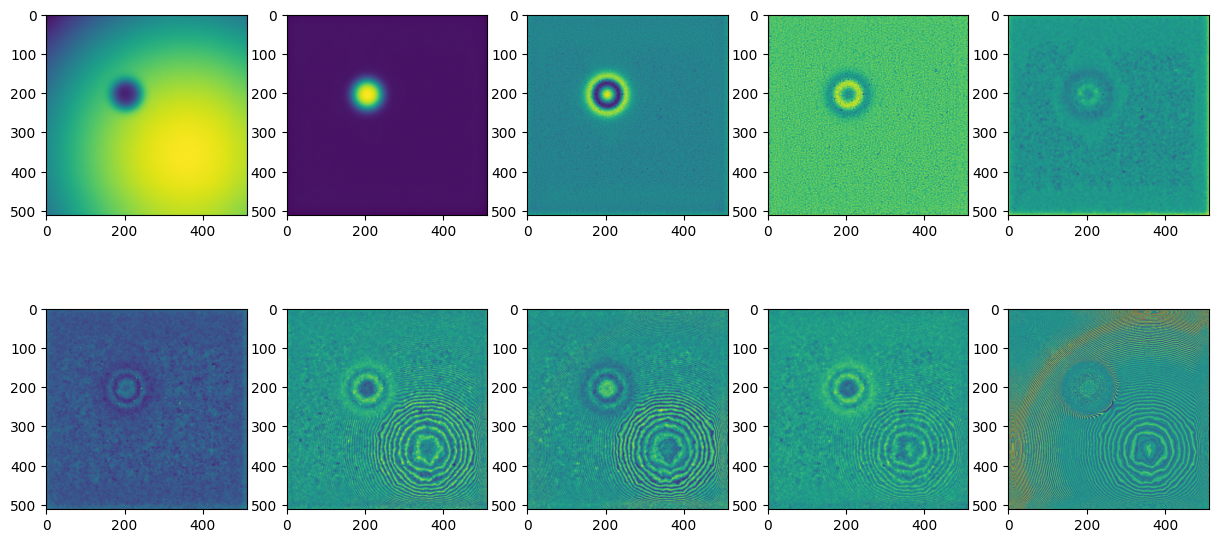

In [22]:
plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Eof_40[i,:,:])

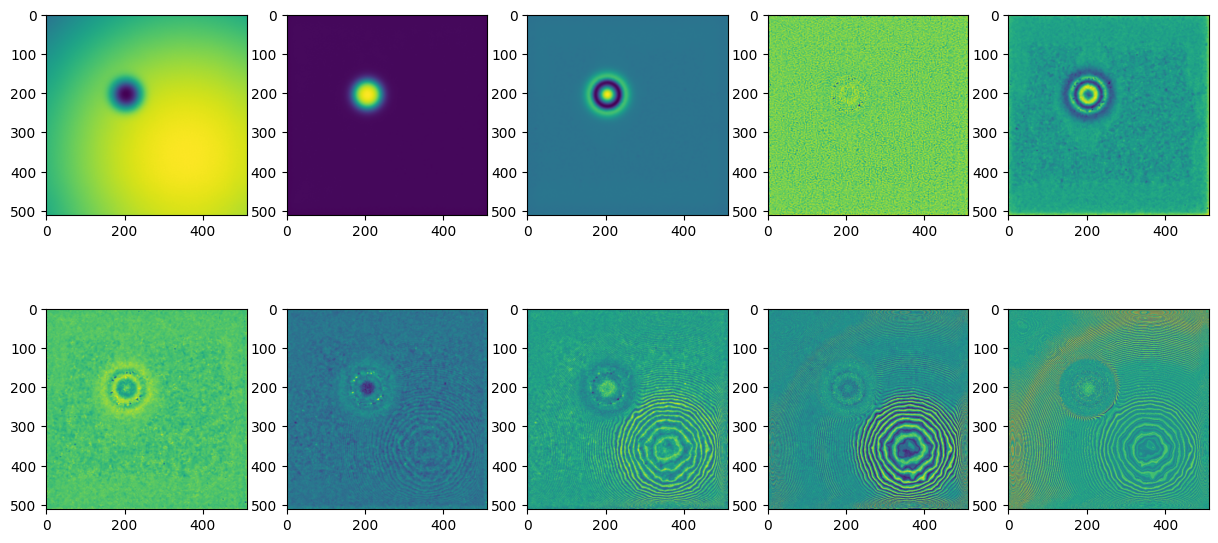

In [23]:
plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Eof_60[i,:,:])

Text(0, 0.5, 'Value of PCA')

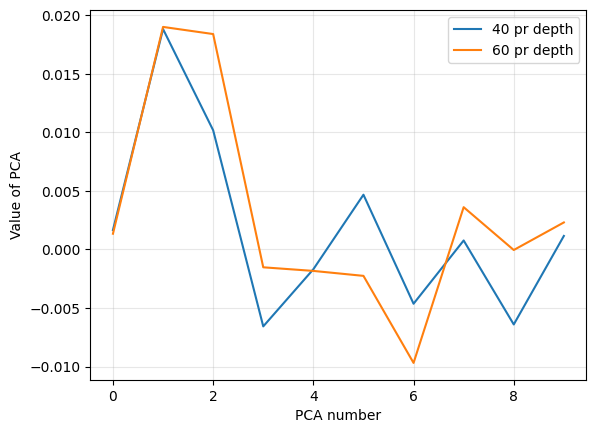

In [34]:
plt.plot(Eof_40[:,210,210],label='40 pr depth')
plt.plot(Eof_60[:,210,210],label='60 pr depth')
plt.grid(alpha=0.3)
plt.legend()
plt.xlabel('PCA number')
plt.ylabel('Value of PCA')

<h1>TSR analysis of the whole sequence

In [24]:
coeff_40,_,_=operator.TSR(data_40_thermal,polynomial_order=5)
coeff_60,_,_=operator.TSR(data_60_thermal,polynomial_order=5)

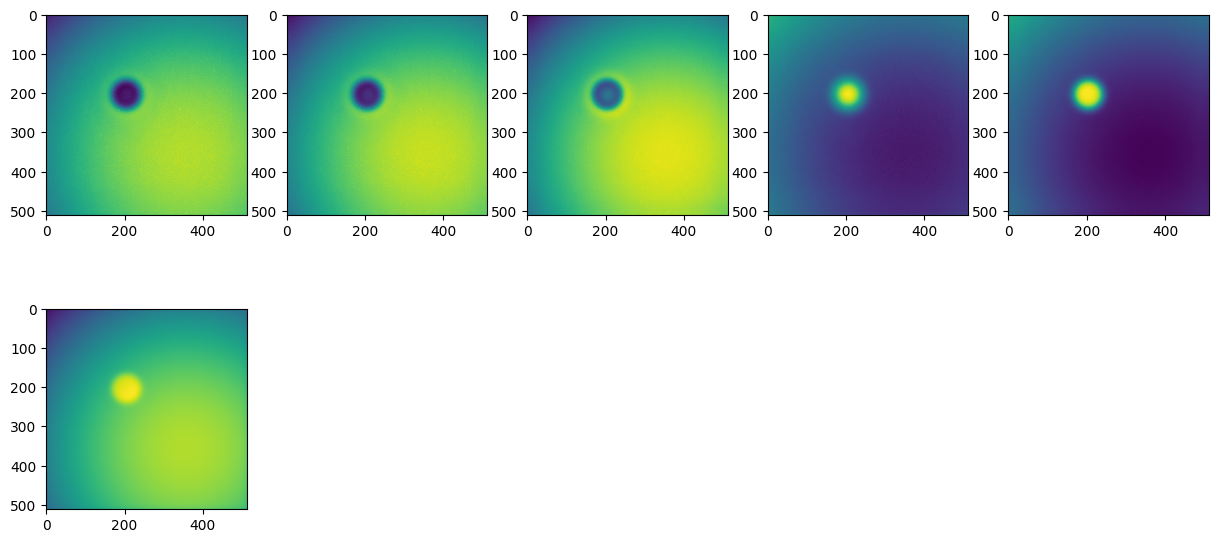

In [26]:
plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,5,i+1)
    plt.imshow(coeff_40[i,:,:])

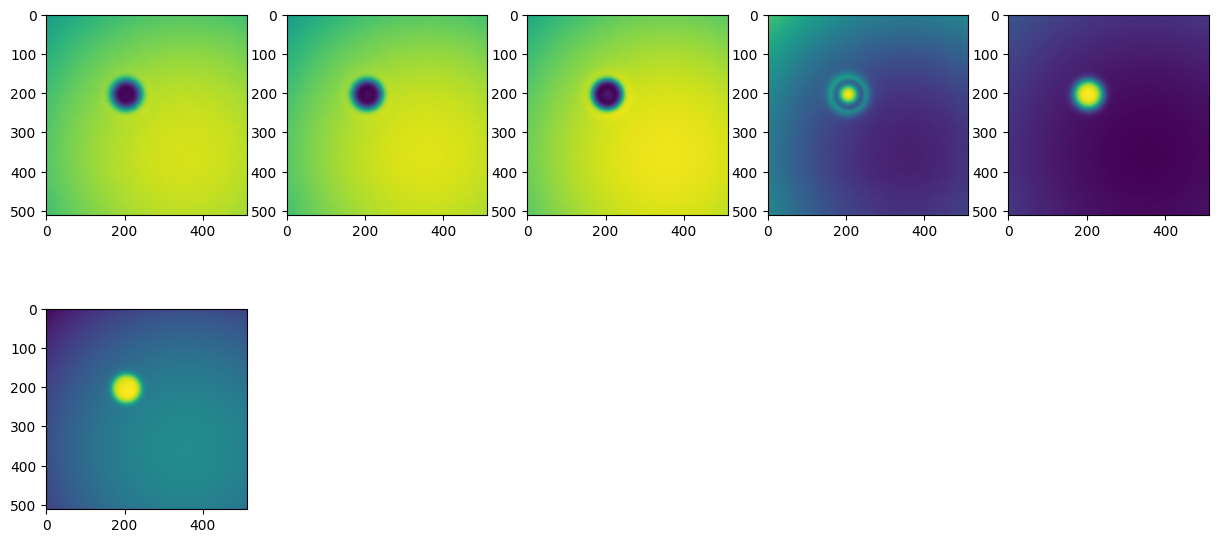

In [27]:
plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,5,i+1)
    plt.imshow(coeff_60[i,:,:])

Text(0, 0.5, 'Value of Coefficient')

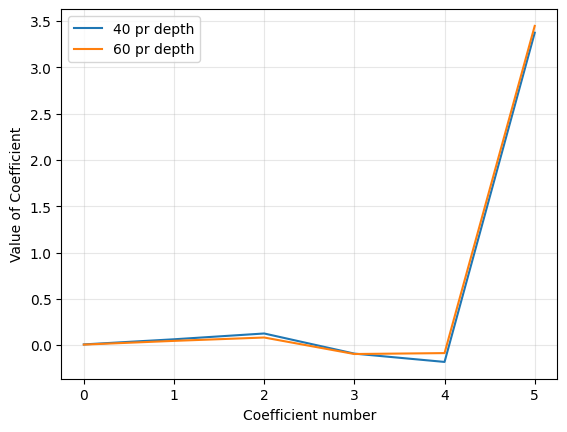

In [35]:
plt.plot(coeff_40[:,210,210],label='40 pr depth')
plt.plot(coeff_60[:,210,210],label='60 pr depth')
plt.grid(alpha=0.3)
plt.legend()
plt.xlabel('Coefficient number')
plt.ylabel('Value of Coefficient')